<h1 style="font-family:verdana; color:crimson;"> <center> Sentiment Analysis with NLP Tutorial </center> </h1>
<center><img src="https://hsto.org/webt/t6/sr/jr/t6srjrmjjmm6qn8gpld9emy4txu.gif" width="500"/></center>

# AIM OF NOTEBOOK
Nowadays, user reviews are one of the most effective methods to buy a product, or not. These reviews can both give an idea to customers and be feedback for manufacturers since the reviews show the positive sides and the sides to be improved. In this project, sentiment analysis will be implemented in a product on Amazon, and each step of NLP and sentiment analysis will be explained. Summarily, this is a tutorial notebook that includes the implementation of NLP and Sentiment Analysis with a dataset that includes Amazon reviews.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #581845;background-color:#581845; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Import Libraries and Check Data<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Text Preprocessing<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Text Visualization<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Sentiment Analysis<span class="badge badge-primary badge-pill">4</span></a>
 <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Feature Engineering<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="messages" target="_self" style = "color:#581845; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Sentiment Modeling<span class="badge badge-primary badge-pill">6</span></a>
 
    
</div>
</div>
</div>

---

<a id = "1"></a>
# 1. Import Libraries and Check Data 🧐

In [1]:
# Download the libraries if you don't have
# !pip install nltk
# !pip install textblob
# !pip install wordcloud

In [2]:
!pip install plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.3 MB 4.8 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/16.3 MB 6.2 MB/s eta 0:00:03
   -------- ------------------------------- 3.4/16.3 MB 6.3 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/16.3 MB 6.6 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.3 MB 6.5 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/16.3 MB 6.6 MB/s eta 0:00:02
   --------------------- ------------------ 8.9/16.3 MB 6.6 MB/s eta 0:00:02
   ------------------------- -------------- 10.5/16.3 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.3 MB 6.7 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.3 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 14.7/16.3 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.3 MB 6.7 MB/s eta 0:00:01
 

In [3]:
# Basic Libraries 📚
# --------------------------------------
import numpy as np
import pandas as pd


# Plot library 📊
# --------------------------------------
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio


# NLP
# --------------------------------------
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud  # visualization of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Metrics 📐
# --------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder


# Machine Learning Models 🤖
# --------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Customize to Remove Warnings and Better Observation 🔧
# --------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<strong><h2>Bussines Problem</h2><p>
It aims to increase its sales by analyzing the comments received on Kozmos products, which makes production focused on home textiles and daily wear, and by improving their features according to the complaints received. In line with this goal, the comments will be labeled by performing sentiment analysis and a classification model will be created with the labeled data.</p>
    
    
<strong><h2>Dataset Story</h2></strong>
<blockquote><p><strong> The data set consists of the comments made for a certain product group, the title of the comment, the number of stars and the variables that indicate how many people found the comment useful. </strong></p>
</blockquote>
    
<br>


<li><strong>Total Features : 4</strong></li>
<li><strong>Total Row : 5611</strong> </li>
<li><strong>CSV File Size : 489 KB</strong></li>


 Sr. | Feature  | Description |
--- | --- | --- 
1 | Star | Number of stars given to the product
2 | Helpful | Number of people who found the comment helpful
3 | Title | Title given to comment content, short comment
4 | Review | Review of the product

---
   

In [6]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [7]:
df = pd.read_excel("amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [8]:
df.isnull().sum()

Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

Just drop the missing values without deep analysis for process.

In [9]:
df.dropna(subset=['Review'], inplace=True)
df.isnull().sum()

Star        0
HelpFul     0
Title      43
Review      0
dtype: int64

<a id = "2"></a>
# 2. Text Preprocessing 📝

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Normalizing Case Folding</span>

In the data set, some letters are uppercase and some letters are lowercase. The disadvantage of mixed lowercase-uppercase letters is that the same word may start with a capital letter at the beginning of the sentence while it is lowercase in the middle of the sentence. When we wanted to measure by creating word vectors and representing the word, we would not be able to distinguish words that are normally the same word because of uppercase and lowercase letters, and a measurement problem would arise. So, the frequency cannot be enriched.

In [10]:
# to put all the characters in a standard
df['Review'] = df['Review'].str.lower()  # make all lowercase

---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Punctuations</span>

Similar to upper and lower case, punctuation marks do not contain a measurement value. For example, if we think that we are making a classification example, there are 2 reviews one of these has much more points/commas. In this situation, we do NOT expect any pattern from punctions. While this is the common approach, it may vary depending on the business problem.

In [11]:
# check sentences and replace punctions with spaces
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

This usage is called **"Regular Expression"**. Regular expression is a special way used to identify, capture and work with a particular pattern in textual expressions. The details of the regular expression can be searched, the general usage is given above. We will not be detailed here.

***

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Numbers</span>

<div class="alert alert-danger" role="alert">
        <b> REMINDER: </b> <br>Like the above, our business problem may have discrimination about numbers. For instance, including much or fewer numbers can be crucial for the business problem. In this kind of problem, removing numbers is not a way we will use. In our example, we remove the numbers because the numbers are not distinctive.
</div>
<br>

The general approach is to remove all problematic structures outside the text. For example, when there is social media data, we may choose to remove emojis, page links, etc. However, it may be such a task that we may need to focus on them.

We capture numbers via regular expression. <code>\d</code> help us to catch numbers.

In [12]:
df['Review'] = df['Review'].str.replace('\d', '')  

---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Stopwords</span>

Commonly used words in the language do not have the measurement. Expressions such as various conjunctions such as *is*, *for*, *this*, or various pronouns have no metrical meaning. Therefore, we will delete these expressions.

We have to download "stopwords" from nltk library. It has been prepared for English, there are studies for other languages as well. Therefore, you can use the language you want as an argument.

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SYST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# save the downloaded stopwords
sw = stopwords.words('english')

<div class="alert alert-block alert-info">
        <b> 📌 We need to go to the reviews and delete if there are stopwords in the text or select outside words of these stopwords.</b>
</div>
<br>

The process:
* <code>apply</code> allows function navigation, then let's write an apply function with <code>lambda</code>.
* Let's go through the reviews, <code>split</code> each line to get all the words one by one.
* After splitting, let's look at each word one by one (for example, with the help of the list comprehension), then, take the words that are not in stopwords, and <code>join</code> these words.

In [15]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

<div class="alert alert-success alert-info">
       <b> 📌 There may be words that we want to remove, we can write them as a list and remove the words we do not want with the code above. </b>
</div>
<br>

---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Rarewords</span>

This section may not always be in the NLP process. Keeping rare words in modeling processes is a situation we generally do not want. We may want to remove them under our control. In other words, we may want to exclude words that make no sense, similar to logic of <span style="color:#FF0000">Stopwords</span> section.

In [16]:
# to find how many times words counts
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()
temp_df

love                1271
curtains            1251
like                1017
look                 818
great                721
                    ... 
pastel-ish             1
inserts                1
months.<br>stood       1
bleak                  1
studio/living          1
Name: count, Length: 10592, dtype: int64

In [17]:
# choose the words with less than 2 frequencies to drop
drops = temp_df[temp_df <= 1]

The process is similar to Stopwords section. Look the "Review" column, split the reviews, then, join the words that are not in **drops**.

In [18]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

<div class="alert alert-danger" role="alert">
        <b> NOTE: </b> <br> We could make a single string for preprocessing and go over it, but we're trying to stay at the dataframe level. Since working on dataframe is a more difficult scenario, we proceed here like this.
</div>
<br>

---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Lemmatization</span>

It is the process of reducing the words into their roots. For example, removing the plural suffix "s" at the end of words.

For this, we have to do the following downloads first.

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SYST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SYST\AppData\Roaming\nltk_data...


True

In [20]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

<div class="alert alert-success alert-info">
       <b> 📌 We got rid of many situations that would be problematic in the data set. In our own works, there may be different studies in terms of language or structuralism, we have eliminated the structures that should be removed from a text in general terms. </b>
</div>
<br>


<a id = "3"></a>
# 3. Visualization 🖼

We will make some visualizations for exploratory data analysis. It is not for modeling, it is for observation and knowing data better.

### <span style="color:#1F51FF"><b>Calculation of Term Frequencies</b></span>

We can use Bar Plot, WordCloud or visualization techniques that can be used for categorical features by obtaining a numeric value.


In [21]:
# extract the term frequencies(frequency of the words) and create a df
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.head()

,index,0
0,happy,171.00
1,good,453.00
2,quality,609.00
3,material,398.00
4,however,36.00


In [22]:
# fix the column names
tf.columns = ["words", "tf"]  

In [23]:
# to see the most frequent words
tf.sort_values("tf", ascending=False)

,words,tf
59,curtain,1773.00
35,look,1459.00
114,love,1412.00
168,like,1033.00
22,great,721.00
...,...,...
2655,present.,2.00
2652,doubt,2.00
2650,"opening,",2.00
2648,"solid,",2.00


<div class="alert alert-warning alert-info">
        <b> 📌 Above, we have a way to observe, not in terms of modeling, but in terms of exploring and analyzing.</b>
</div>
<br>


---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Bar Plot</span>

We have thousands of words. Since it would not be logical to show them all, let's take the ones with acceptable frequencies.
> **300 has been chosen here, but it is optional and can be changed.**

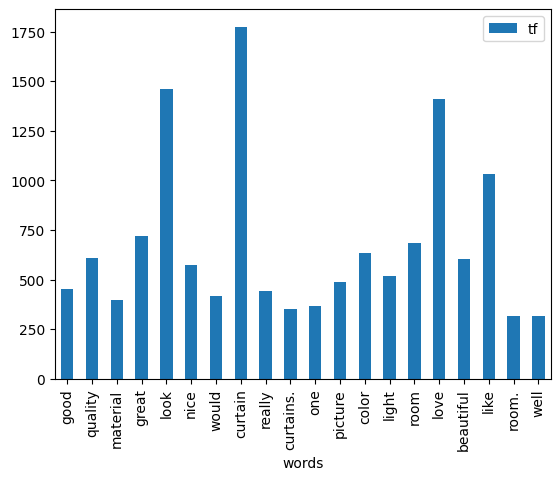

In [24]:
tf[tf["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

<div class="alert alert-success alert-info">
       <b> 📌 We came here without knowing which product these reviews belong to. The benefit of this kind of plotting is that after seeing these words, we can get an idea according to the words such as "curtain", "room", "window" etc. It seems like it is a textile product, and the reviews are about "curtain". </b>
</div>
<br>

The examples of analysis we can make after this:
* We have the "Star" of the product. If the reviews that have less than 3 stars are filtered, we can the words for the problems of this product, and these problems can be fixed in manufacturing. 
* Similarly, if the filter process is done for reviews that have more than 3 stars, the strong sides of the product can be revealed.
* If we did this for 5 different products, we could see on which subjects the products received the most likes or complaints. 
---

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Word Cloud</span>

It allows to creation cloud shaped visuals according to the frequency of the words in the relevant text.

<div class="alert alert-block alert-info">
        <b> 📌 For this, we need to specify all the texts as a single text. So, we have to make a single line to all elements of Review column.</b>
</div>
<br>

In [25]:
# check every row and join with these with a space
text = " ".join(i for i in df.Review) 

> **WordCloud performs the getting and counting of all the words that are in a text format. It performs the operations automatically that we have done manually above. It extracts the frequencies and reflects on the graph according to the frequencies.**

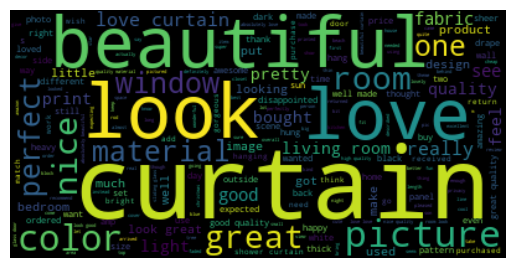

In [26]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

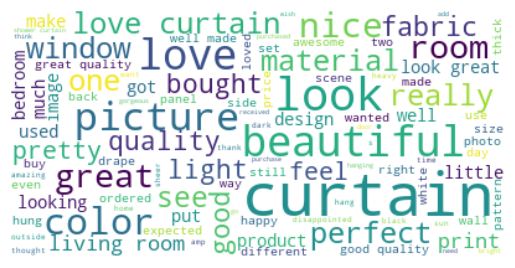

In [27]:
# configure the graph
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id = "4"></a>
# 4. Sentiment Analysis 😍😕
This section will be divided into 2 parts. The first part is to explain methods and how to use sentiment analysis. The second part is to implementation of sentiment analysis in our dataset. 

1. Sentiment Analysis Tutorial 📖
2. Implementation to Our Dataset ✍️

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Sentiment Analysis Tutorial 📖</span>

Sentiment Analysis aims to express the emotional state of the texts in a mathematical way. Let's say we have a sentence, each word in it has positive/negative/neutral meanings. These meanings are evaluated holistically and evaluations are made about whether a text is positive or negative.

In [28]:
df["Review"].head()

0                                                happy
1                  good quality material however panel
2    product fun bedroom windows.<br bit stretched,...
3                              lo que e que un poco ma
4    great bang can't believe quality material. vib...
Name: Review, dtype: object

For instance, "good" has a negative meaning here. There is a pre-trained model in nltk for the meanings of words that can carry negative / positive values in this way. Such models are called <span style="color:#FF0000"><b>pretty rate models</b></span>. Thanks to this pretty rate model, we find existing word sets and scores. These scores are called <span style="color:#FF0000"><b>polarity scores</b></span>. 

For this, we have to do the following download first.

In [29]:
nltk.download('vader_lexicon')  # pre-trained model for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SYST\AppData\Roaming\nltk_data...


True

In [30]:
# Example 1
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

* **negative score = 0**
* **neutral score = 0.42**
* **positive score = 0.57**
* **compound score = 0.62**

<div class="alert alert-block alert-info">
        <b> 📌 OUR FOCUS IS THE <ins>COMPOUND SCORE</ins>. Scores from the Compound Score are between -1/1. If the score is less than 0, the text is negative; if it is higher than 0, it means the text is positive.</b>
</div>
<br>


In [31]:
# Example 2
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

---
<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Implementation to Our Dataset ✍️</span>

It means that we can implement this method on Review column and extract the polarity score of each text according to above information.

In [32]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)) 

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
2    {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...
Name: Review, dtype: object

In [33]:
# take only compound scores
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"]) 

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.93
8   0.00
9   0.71
Name: Review, dtype: float64

In [34]:
# save the scores as a new column
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

<div class="alert alert-success alert-info">
       <b> 📌 Sentiment analysis is generally used to use users' satisfaction and is a method that attracts attention. In fact, sector-specific sentiment analyzes are also carried out on special word sets prepared specifically for the relevant sets. </b>
</div>
<br>

> <span style="color:#FF0000"><b>So what will the polarity_score we get do?</b></span><br>
<b>There are different types of work that can be done depending on the approach. For example, those who have scores less than 3 in the overall variable (the star users give to the product) and write positive sentences (polarity_score>0) can be deduced from this, and the contrasts and anomalies in the data set can be examined. Similarly, it is possible to check low stars with high polarity_score, there is a possibility that those people gave wrong scores. These people can be reached and the stars can be fixed.<br><br>
Sentiment analysis can be enriched according to different approaches. Product benchmarking, brand benchmarking, competitor analysis etc. can be done. It can be done on Amazon or other platforms as well.</b>

<a id = "5"></a>
# 5. Feature Engineering 🏗

**Firstly, we have to understand how to convert an unsupervised learning problem to a supervised learning problem.**
<center><img src="https://learn.g2crowd.com/hubfs/unsupervised-learning.png" width="500"/></center>

<div class="alert alert-block alert-info">
        <b> 📌 Let's say we have an unsupervised learning method. To make this supervised, we create labels (like positive-negative). Then, we choose the labels we created as the target variable, so that when a new data comes in, we get which class it belongs to as a result of the model.<br><br>
            🏁 We can look at the model building phase as starting here because we will create a label and select it as the target variable, and now we will have a supervised learning question.
</b>
</div>
<br>

Let's start with an example, then, apply it to all variables on Review column.

In [35]:
# we have such values and we will create a new variable by taking all of them so that we have a label.
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [36]:
# if we want to see this example with new label and pos/neg side by side
rev_pol = pd.concat([df["Review"][0:10], df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")], axis=1)
rev_pol.columns = ["Review", "Polarity Scores"]
rev_pol

,Review,Polarity Scores
0,happy,pos
1,good quality material however panel,pos
2,"product fun bedroom windows.<br bit stretched,...",pos
3,lo que e que un poco ma,neg
4,great bang can't believe quality material. vib...,pos
5,look different photo,neg
6,exactly looking for. heavy material. great pri...,pos
7,"looking picture, thought curtain would thinner...",pos
8,much thought would wasn’t really expecting wan...,neg
9,curtain picture shows. 3rd set ambesonne curta...,pos


> **Let's assign a new variable with a polarity score greater than 0 to be positive and the smaller ones to be negative.**

In [37]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()

sentiment_label
pos    4786
neg     807
Name: count, dtype: int64

> **Let's look at the averages of scores of positive/negative comments.**

In [38]:
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg   3.50
pos   4.56
Name: Star, dtype: float64

<span style="color:#008000"><b>It seems logical and we are on the right road! 🥳</b></span>

> **Our label has a string naming as pos/neg which is not binary encoded, let's pass it through label_encoder.**

In [39]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [40]:
y = df["sentiment_label"]
X = df["Review"]

In [41]:
print(" X ".center(50, "~"))
display(X.head())
print("")
print(" Y ".center(50, "~"))
display(y.head())

~~~~~~~~~~~~~~~~~~~~~~~ X ~~~~~~~~~~~~~~~~~~~~~~~~


0                                                happy
1                  good quality material however panel
2    product fun bedroom windows.<br bit stretched,...
3                              lo que e que un poco ma
4    great bang can't believe quality material. vib...
Name: Review, dtype: object


~~~~~~~~~~~~~~~~~~~~~~~ Y ~~~~~~~~~~~~~~~~~~~~~~~~


0    1
1    1
2    1
3    0
4    1
Name: sentiment_label, dtype: int32

<div class="alert alert-danger alert-info">
        <b> 🤔 As you can see, we got arguments in X, but what we have is text and not variable/variables, no measurement values, we need to bring them to measurable format. We need to generate features from these texts, we need to derive features that are measurable and can be put into mathematical operations.<br><br>
            🚨 THE MOST CRITICAL POINT OF NLP WORKS IS THE NUMERICAL REPRESENTATIONS OF TEXTS AND WORDS. IN OTHER EXPRESSIONS, THEY ARE THE STUDY OF VECTORING WORDS.
</b>
</div>
<br>





In other words, we need to perform such operations on X so that we can bring it into a measurable format, on which mathematical operations and machine learning modeling can be performed. For this we need to create word vectors. Commonly used methods:
- Count Vectors 
- TF-IDF
- Another Word Embeddings Methods(Word2Vec, GloVe, BERT etc.)

We will analyze the implementation of Count Vectors and TF-IDF. Another word embedding methods can be researched and applied with similar preprocess(such as remove punctions, numbers etc.). Each of these methods is the method used by the computer to put these texts into mathematical operations in the world of linear algebra. The text I have is in the form of a text and I have to do something with this text so that it can be processed in the linear algebra world. Let's start to explanation of methods and application on our dataset.

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Count Vectors 💯</span>

<span class="label label-default" 
     style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
Explanation and Examples
</span>

Count vectors means subtracting the frequencies of words. For example, it is to extract how many times the words in the review are used. So how do we represent these words (words, characters, ngrams).

Method  | Description |
--- | --- 
Word | Numerical representations of each word (Ex: numerical, word, each)
Characters | Numerical representations of each characters(Ex: n, u, m, e, r etc.)
Ngam | Refers to producing features according to word phrases

Let's make an example for <span style="color:#FF0000"><b>ngrams</b></span> for better understaing.

In [38]:
a = """ngram is a contiguous sequence of n items from a given sample of text or speech."""

TextBlob(a).ngrams(3)  # For example, let's create a triple ngram

[WordList(['ngram', 'is', 'a']),
 WordList(['is', 'a', 'contiguous']),
 WordList(['a', 'contiguous', 'sequence']),
 WordList(['contiguous', 'sequence', 'of']),
 WordList(['sequence', 'of', 'n']),
 WordList(['of', 'n', 'items']),
 WordList(['n', 'items', 'from']),
 WordList(['items', 'from', 'a']),
 WordList(['from', 'a', 'given']),
 WordList(['a', 'given', 'sample']),
 WordList(['given', 'sample', 'of']),
 WordList(['sample', 'of', 'text']),
 WordList(['of', 'text', 'or']),
 WordList(['text', 'or', 'speech'])]

> **Groups a word in 3, moves on to the next word and groups it in 3, etc. So ngram is to break words into chunks with groups.**

So, we can count <span style="color:#FF0000"><b>words</b></span>, <span style="color:#008000"><b>characters</b></span>, <span style="color:#0000FF"><b>ngrams</b></span>.

For example, we have 4 sentences (1st document, 2nd document etc.), it can be anything we get here, for example 1st tweet, 2nd tweet etc. If we look at our example dataset, we have 1st review, 2nd review... In short, it refers to different units that we are interested in.

In [42]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [44]:
# word frequency
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)  # we transformed the corpus with fit_transform
vectorizer.get_feature_names_out()  

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

> **We extract unique words (ie we thought the whole text as a single text and brought the unique words) => ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third' ', 'this']**

In [45]:
X_c.toarray()  # we vectorized each unit

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

It means:
* First document includes 0 "and", 1 "document", 1 "first" etc.
* Second document includes 0 "and", 2 "document", 0 "first" etc.
* Third document includes 1 "and", 0 "document", 0 "first" etc.
* Fourth document includes 0 "and", 1 "document", 1 "first" etc.
---

For ngram, we will use an argument as **analyzer="word"**, if we do not enter any argument, the default of CountVectorizer is to make *word frequency*.

In [47]:
# n-gram
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()  # it brought the words one by one above, now he brought them in phrases

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [43]:
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

It means:
* First document includes 0 "and this", 0 "document is", 1 "first document" etc.
* Second document includes 0 "and this", 1 "document is", 0 "first document" etc.
* Third document includes 1 "and this", 0 "document is", 0 "first document" etc.
* Fourth document includes 0 "and this", 0 "document is", 1 "first document" etc.
---

<span class="label label-default" 
     style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
Application on our dataset


Firstly, we will apply word count, then, ngram process will be done. 

In [48]:
vectorizer = CountVectorizer()  # default => word count
X_count = vectorizer.fit_transform(X)  # X stands for texts, we only count the frequencies of the words

In [49]:
vectorizer.get_feature_names_out()[10:15]  # let's look at some features

array(['15', '1st', '20', '22', '24'], dtype=object)

In [50]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

> **Let's keep this aside, let's produce features according to other methods. For example, let's look at the TF-IDF method, derive features according to both word frequencies and ngrams, then compare the frequencies of these 3 methods in machine learning.**

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">TF-IDF (Term Frequency-Inverse Document Frequency) 📶</span>

<span class="label label-default" 
     style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
Explanation and Examples


**It is a normalized, standardized word vector generation method to eliminate some of the biases that the count vector method may reveal. Count Vectorizer will create biases in favor of words with high frequency and against other words. In order to eliminate this and standardize it, the TF-IDF method has been proposed.**


<div class="alert alert-block alert-info">
        <b> ⚙️ HOW IT WORKS: </b> A standardization process is performed on the focus of the frequency of the words in the documents and the frequency of the words in the whole corpus.
</div>
<br>
 

<div class="alert alert-warning alert-info">
        <b> ⚠️ REMINDER: </b>The most critical point of NLP studies is the effort to represent words/texts numerically, the work of creating a word vector. The method for this is Count Vector, TF-IDF or another Word Embedding methods(such as Word2Vec, GloVe, BERT which can be considered as more advanced methods).
</div>
<br>

TF-IDF Steps:
1. Calculates Count Vectors
2. Calculate TF (frequency of t term in related document/total number of terms in document)
> In other words, we subtract the weight of a particular word in a particular document.
3. Calculate IDF( 1+loge( (total number of documents+1)/(number of documents with t term in it+1) )
> In terms of all documents, we extract information about the relevant terms.

##### **In step 2, we focused on the words within each document, and in step 3, we try to consider the impact of terms on all documents.**
4. Calculate TF*IDF (we multiply the TF matrix by the vector IDF)
5. Perform L2 Normalization. Find the square root of the sum of the squares of the rows, divide all the cells in the corresponding row by the value you found.

> Of course, the library will implement these steps for us and we will use the results coming from TF-IDF directly.

When creating the Count Vector, there was a question whether we are doing this for words, characters, or ngrams. Similarly for TF-IDF, there is the question whether to do it for words, characters, or ngrams. As an example, let's do word and ngram as before.

We will use "corpus" that we created above, again.

In [51]:
# word frequency
tf_idf_word_vectorizer = TfidfVectorizer()  # default = word frequency
corpus_tf_idf_word = tf_idf_word_vectorizer.fit_transform(corpus)
tf_idf_word_vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [52]:
corpus_tf_idf_word.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

> **Same with Count Vectors, each text on corpus were taken and each words' TF-IDF scores were calculated above according to word frequency.**

In [53]:
# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
corpus_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)
tf_idf_ngram_vectorizer.get_feature_names_out()

array(['10 10', '10 10 thought', '10 days', ...,
       'zoomed resolution really', 'zoomed that', 'zoomed that probably'],
      dtype=object)

In [54]:
corpus_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

> **Above, we can see the TF-IDF scores to ngrams.**

<span class="label label-default" 
     style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
Application on Our Dataset


Since our reviews are saved on X, we will use same process using X rather than corpus.

In [55]:
# word
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [56]:
# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

<div class="alert alert-block alert-info">
        <b> 📌 Finally, we created all of the features. As a reminde, our features are word frequency according to CountVectorizer and TF-IDF scores for words and ngrams. It means, we create 3 features.</b>
</div>
<br>

---


<a id = "6"></a>
# 6. Sentiment Modeling 💻

Just remember our processes:
1. Import and Check Data
2. Text Preprocessing
3. Text Visualization
4. Sentiment Analysis
5. Feature Engineering
6. Sentiment Modeling

Since we will treat it as a classification problem, we look at classification algorithms. In here, we will use Logisctic Regression and Random Forest. Another classification algorithms can be used, as well.

Also, neural network can be used for Sentiment Analysis. Since the running time will be too long using LSTM, we will not show this method in this notebook. You can check my another notebook about this:

[Sentiment Analysis with LSTM](https://www.kaggle.com/code/furkannakdagg/sentiment-analysis-with-lstm)

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Logistic Regression</span>

In [57]:
# Words with TF-IDF
log_model = LogisticRegression().fit(X_tf_idf_word, y)
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8980876741148579

> **Let's predict if a new review comes out.**

In [58]:
# get a new comment
new_review = pd.Series("this product is great")

> **We vectorized the words in the process, we can also vectorize the words of the new review and ask the model to predict.**

In [59]:
# vectorize the new review
new_review = TfidfVectorizer().fit(X).transform(new_review)

# predict the sentiment of review
log_model.predict(new_review)

array([1])

> **1 means positive review, 0 means negative reviews.**

In [60]:
# Let's pick a sample comment from the original dataset and ask it to the model
sample = df["Review"].sample(1).values
print(sample)
random_review = pd.Series(sample)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

['returned look like picture advertised.']


array([1])

<span class="label label-default" style="background-color:#581845; border-radius:3px; font-weight: bold; font-family:Verdana; font-size:16px; color:#FBFAFC; ">Random Forest</span>

Let's create a model according to 3 different methods and compare their success.

In [61]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
print("Count Vectors Score", cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()) 

# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
print("TF-IDF Word-Level Score", cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
print("TF-IDF N-Gram Score", cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean())

Count Vectors Score 0.9342046070395718
TF-IDF Word-Level Score 0.9243686462964472
TF-IDF N-Gram Score 0.8616127995702783


> **Let's plot these scores.**

In [62]:
%%time
def score(method_list):
    scores = []
    for method in method_list:
        rf_model = RandomForestClassifier().fit(method, y)
        scores.append(cross_val_score(rf_model, method, y, cv=5, n_jobs=-1).mean())
        
    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})
    
    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#2ECC71','#34495E','#D0D3D4'],
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group", 
                       title={'text': "Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)
    
method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)

CPU times: total: 14.2 s
Wall time: 3min 35s


<div class="alert alert-block alert-info">
        <b> 📌 The 3 methods above were the feature generation method. We built models for each and looked at 5-fold cross validation.</b>
</div>
<br>

<span class="label label-default" 
     style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">
Hyperparameter Optimization
</span>

Since we got the highest success from the Count Vectors model, let's continue with it. Firstly, let's explain the method that we will use called as **GridSearchCV**.

<span style="color:#FF0000"><b>GridSearchCV:</b></span> A separate model is created with all combinations for the hyperparameters and their values that are desired to be tested in the model, and the most successful hyperparameter set is determined according to the specified metric. Simply, we will give a parameter set, and the method will try the all of the values we give on the set, and get the best result.

In [59]:
rf_model = RandomForestClassifier(random_state=17)  # create an empty model object

We apply GridSearchCV with a small number of parameter values in order not to prolong the process. More parameters and more values can be experimented with, this will increase the processing time so we give a brief overview here.

In [60]:
%%time
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]
             }

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [61]:
# best parameters that GridSearchCV found
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [62]:
# set the model with the parameters GridSearchCV found above
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

# our final score
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.9250846894029138

<center style="font-family:cursive; font-size:18px; color:#159364;">Please vote and comment if you enjoyed my kernel, thanks for reading! 🥳</center>